In [1]:
import numpy as np
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt

# Homework 5

## Problem 1

### (A)

We take our background to be a zero-centered Gaussian with a standard deviation of 3.5.

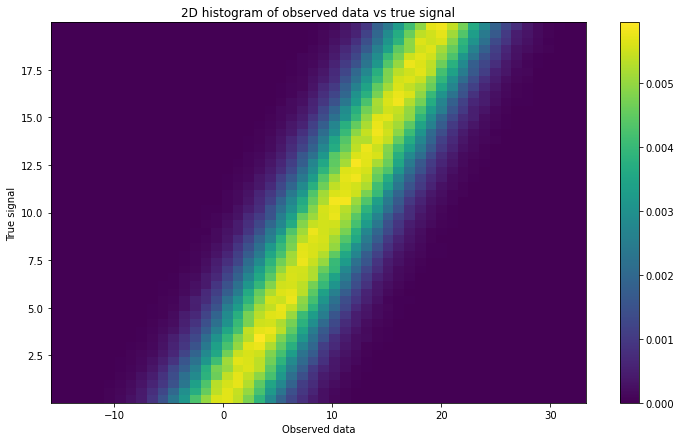

In [2]:
sigma = 3.5
bkgd = stats.norm.rvs(scale=sigma, size=1000000)
signal = stats.uniform.rvs(scale=20, size=1000000)
data = bkgd + signal

fig, ax = plt.subplots(1,1, figsize=(12,7))
_, _, _, img = ax.hist2d(data, signal, bins=50, density=True)
fig.colorbar(img)
ax.set_xlabel("Observed data")
ax.set_ylabel("True signal")
ax.set_title("2D histogram of observed data vs true signal");

### (B)

We now take a slice of this 2D histogram where the signal strength is 10 (or, more accurately, between 9.9 and 10.1). The 1D histogram below is thus what we would expect our distribution of observed data to look like if the true signal strength is 10.

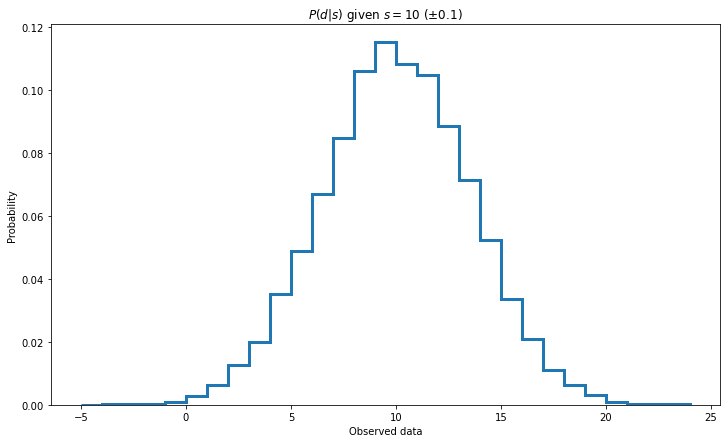

In [3]:
delta = 0.1
true = 10
sel_data = data[np.abs(signal - true) < delta]

x = np.arange(-5,25)
fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist(sel_data, bins=x, histtype='step', linewidth=3, density=True)
ax.set_xlabel("Observed data")
ax.set_ylabel("Probability")
ax.set_title(f"$P(d|s)$ given $s = {true}$ ($\pm {delta}$)");

### (C)

This time, we take the slice where the observed _data_ is 10. Thus, if we observe a single data point of 10, this is the distribution of possible signal strengths that could have produced that observation.

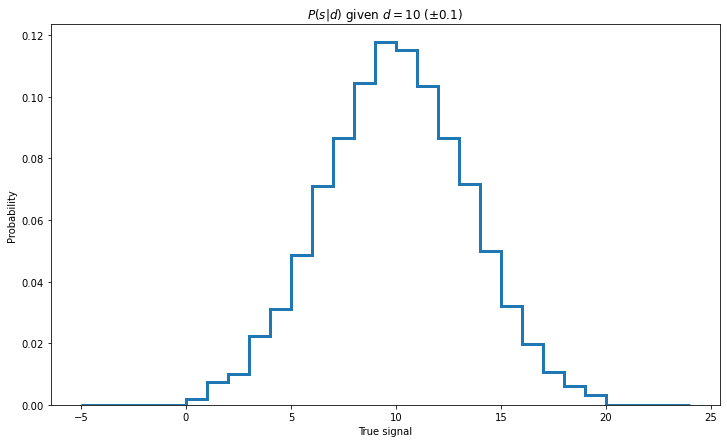

In [4]:
sel_signal = signal[np.abs(data - true) < delta]

fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist(sel_signal, bins=x, histtype='step', linewidth=3, density=True)
ax.set_xlabel("True signal")
ax.set_ylabel("Probability")
ax.set_title(f"$P(s|d)$ given $d = {true}$ ($\pm {delta}$)");

## Problem 2

### (A)

Our background is Gaussian with standard deviation 3.5, as before, but this time it has a mean of 10. In the 2D histogram below, we see that the line begins at 10 along the bottom instead of at 0, reflecting the fact that with a trure signal strength of 0 we would still expect to observe a strength of around 10.

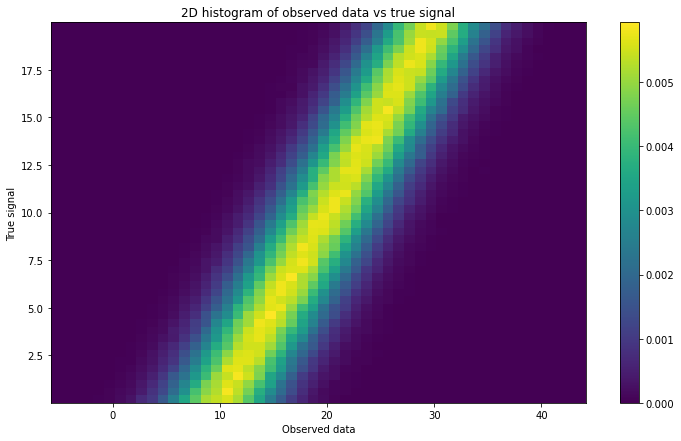

In [5]:
sigma = 3.5
mean = 10.0
bkgd = stats.norm.rvs(loc=mean, scale=sigma, size=1000000)
signal = stats.uniform.rvs(scale=20, size=1000000)
data = bkgd + signal

fig, ax = plt.subplots(1,1, figsize=(12,7))
_, _, _, img = ax.hist2d(data, signal, bins=50, density=True)
fig.colorbar(img)
ax.set_xlabel("Observed data")
ax.set_ylabel("True signal")
ax.set_title("2D histogram of observed data vs true signal");

### (B)

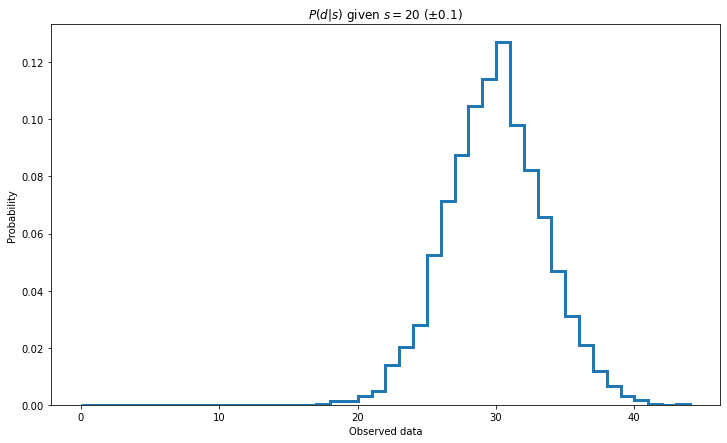

In [9]:
delta = 0.1
true = 20
sel_data = data[np.abs(signal - true) < delta]

x = np.arange(0, 45)
fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist(sel_data, bins=x, histtype='step', linewidth=3, density=True)
ax.set_xlabel("Observed data")
ax.set_ylabel("Probability")
ax.set_title(f"$P(d|s)$ given $s = {true}$ ($\pm {delta}$)");

### (C)

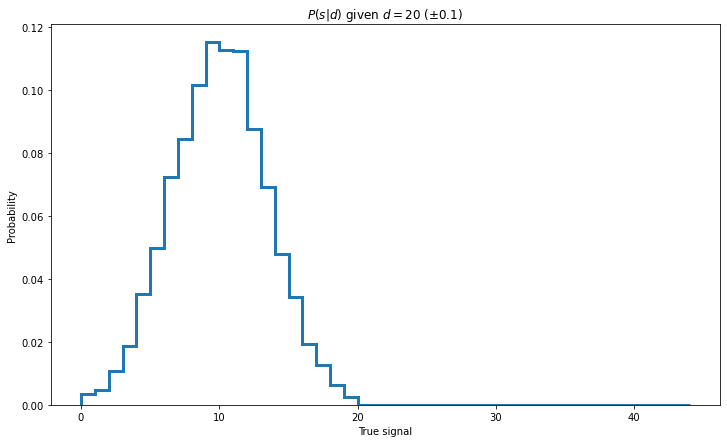

In [10]:
sel_signal = signal[np.abs(data - true) < delta]

fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist(sel_signal, bins=x, histtype='step', linewidth=3, density=True)
ax.set_xlabel("True signal")
ax.set_ylabel("Probability")
ax.set_title(f"$P(s|d)$ given $d = {true}$ ($\pm {delta}$)");

### (D)

Because of the nonzero-mean background, there is no longer a direct correspondence between the observed data and the true signal. If we observe a strength of 20, then the most likely true signal strength is 10, and if the true signal strength is 20 then the most likely observation is 30. This is evident below in the misalignment of the peaks of the $P(s|d)$ and $P(d|s)$ distributions, even though we sliced at the same value for both of them.

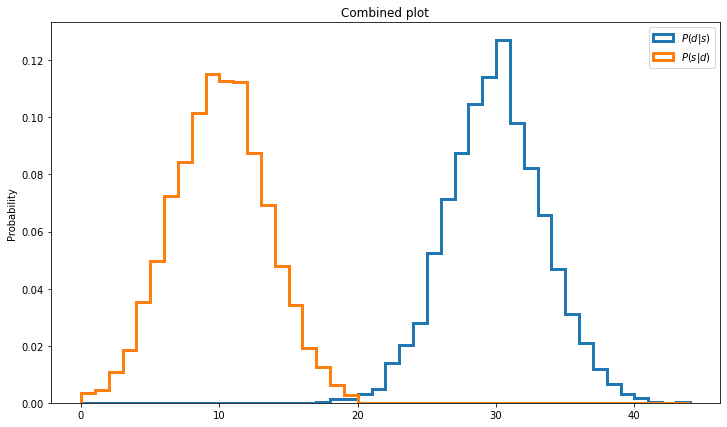

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist(sel_data, bins=x, histtype='step', linewidth=3, label="$P(d|s)$", density=True)
ax.hist(sel_signal, bins=x, histtype='step', linewidth=3, label="$P(s|d)$", density=True)
ax.legend()
ax.set_ylabel("Probability")
ax.set_title(f"Combined plot");